In [68]:
from ipyupload import FileUpload
import skrf as rf
%matplotlib inline
from pylab import *
rf.stylely()

w = FileUpload(accept='.s2p,.s1p', multiple=True, disabled=False, style_button='', compress_level=0)
display(w)


FileUpload(accept='.s2p,.s1p', multiple=True)

In [108]:
thru = rf.Network('thru2.s2p')
#thru_n = rf.Network('thru2n.s2p')
#thru_n.frequency = thru.frequency
thru_n = rf.Network('new.s2p')

<Figure size 720x480 with 0 Axes>

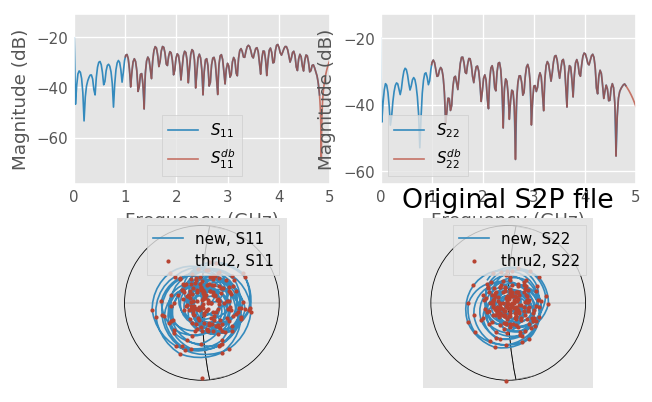

<Figure size 720x480 with 0 Axes>

In [161]:
import matplotlib
import matplotlib.pyplot as plt

figure(0)

fig,axs = plt.subplots(2,2)

title('Original S2P file')
thru.s11.plot_s_db(label='$S_{11}$', ax = axs[0,0])
thru_n.s11.plot_s_db(label='$S_{11}^{db}$', alpha=0.7, ax = axs[0,0])

figure(1)
thru.s22.plot_s_db(label='$S_{22}$', ax = axs[0,1])
thru_n.s22.plot_s_db(label='$S_{22}^{db}$', alpha=0.7, ax = axs[0,1])

figure(2)


thru_n.plot_s_smith(0,0, r= 0.1, draw_labels=True, ax=axs[1,0])
thru.plot_s_smith(0,0, r= 0.1, draw_labels=True, marker='.', linestyle='', ax=axs[1,0])

thru_n.plot_s_smith(1,1, r= 0.1, draw_labels=True, ax=axs[1,1])
thru.plot_s_smith(1,1, r= 0.1, draw_labels=True, marker='.', linestyle='',ax=axs[1,1])


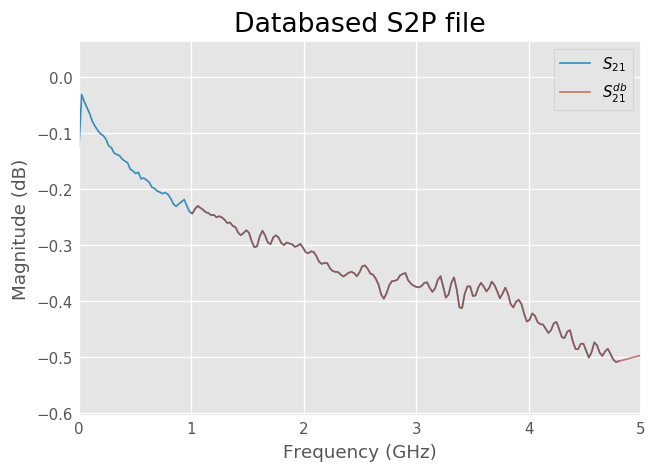

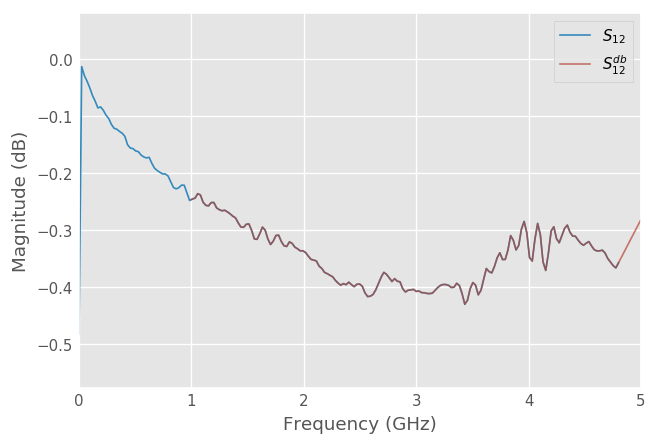

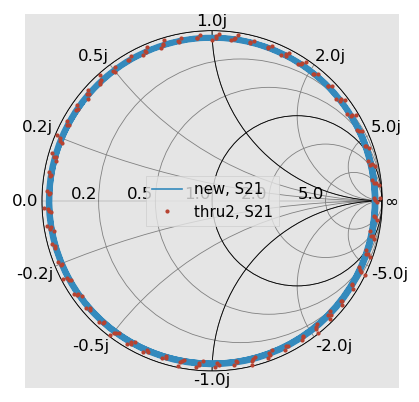

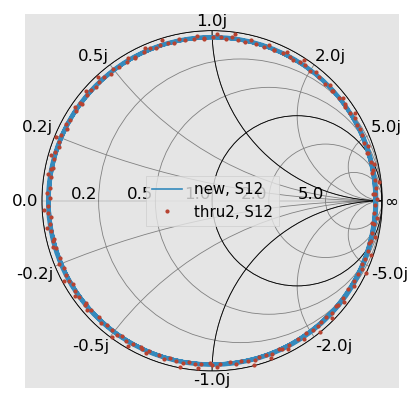

In [148]:
figure(0)
title('Databased S2P file')
thru.s21.plot_s_db(label='$S_{21}$')
thru_n.s21.plot_s_db(label='$S_{21}^{db}$', alpha=0.7)

figure(1)
thru.s12.plot_s_db(label='$S_{12}$')
thru_n.s12.plot_s_db(label='$S_{12}^{db}$', alpha=0.7)

figure(2)
thru_n.plot_s_smith(1,0, r=1, draw_labels=True)
thru.plot_s_smith(1,0, r= 1, draw_labels=True, marker='.', linestyle='')

figure(3)
thru_n.plot_s_smith(0,1, r= 1, draw_labels=True)
thru.plot_s_smith(0,1, r=1, draw_labels=True, marker='.', linestyle='')


In [80]:
#difference = (thru) # - thru_n)

#difference.plot_s_mag(label='Mag of difference')

#for file in w.value.keys():
#    ntwk = rf.Network(file) #w.value[file]['content']
#    ntwk.plot_s_smith()
    #ntwk.s11.plot_s_db(label=file)
    #ntwk.s11['82-90ghz'].plot_s_db(lw=3,label='Band of Interest')

interpolated comparison


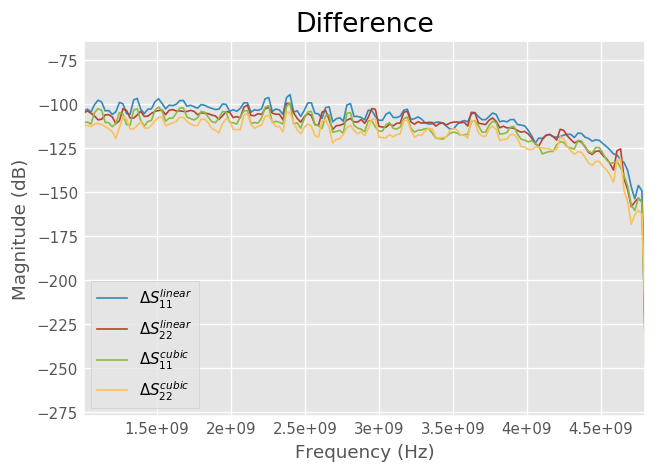

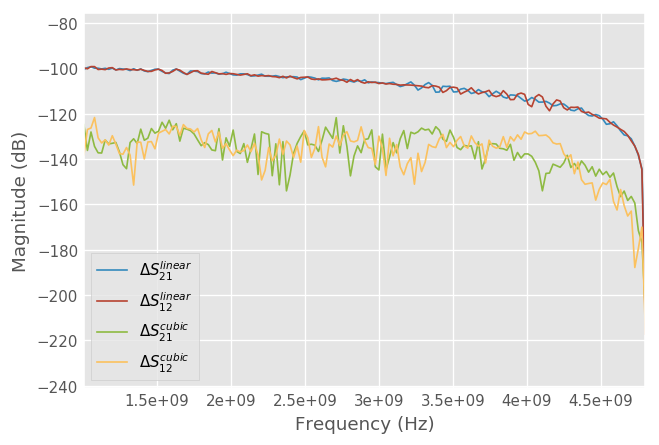

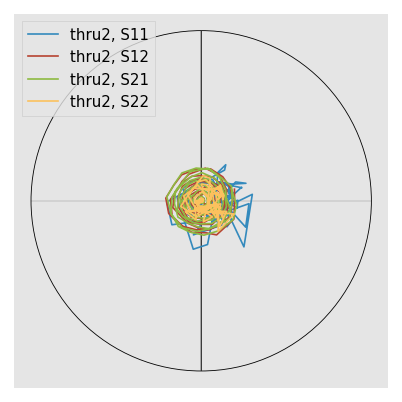

In [154]:
#all_freq_points = sorted(np.unique(thru.f+thru_n.f))
#new_freq = rf.Frequency.from_f(all_freq_points,'Hz')
new_freq = thru.frequency.overlap(thru_n.frequency)

#if thru.frequency != thru_n.frequency:
print('interpolated comparison')
thru2 = thru.interpolate(new_freq, kind = 'linear')
thru_n2 = thru_n.interpolate(new_freq, kind = 'linear')
difference = (thru2 - thru_n2)

thru3 = thru.interpolate(new_freq, kind = 'cubic')
thru_n3 = thru_n.interpolate(new_freq, kind = 'cubic')
difference2 = (thru3 - thru_n3)

figure(0)
title('Difference')
difference.s11.plot_s_db(label='$\Delta S_{11}^{linear}$')
difference.s22.plot_s_db(label='$\Delta S_{22}^{linear}$')
difference2.s11.plot_s_db(label='$\Delta S_{11}^{cubic}$')
difference2.s22.plot_s_db(label='$\Delta S_{22}^{cubic}$')

figure(1)
difference.s21.plot_s_db(label='$\Delta S_{21}^{linear}$')
difference.s12.plot_s_db(label='$\Delta S_{12}^{linear}$')
difference2.s21.plot_s_db(label='$\Delta S_{21}^{cubic}$')
difference2.s12.plot_s_db(label='$\Delta S_{12}^{cubic}$')

figure(2)
difference.plot_s_smith(r=0.00005)